In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('./../plotting.mplstyle')
import sys
sys.path.append('./../code/')
from geometry import *

In [2]:
f_H1L1_O1,C_H1L1_O1,sigma_H1L1_O1 = np.loadtxt('H1L1_O1.dat',unpack=True,skiprows=1)
f_H1L1_O2,C_H1L1_O2,sigma_H1L1_O2 = np.loadtxt('H1L1_O2.dat',unpack=True,skiprows=1)
f_H1L1_O3,C_H1L1_O3,sigma_H1L1_O3 = np.loadtxt('H1L1_O3.dat',unpack=True,skiprows=1)
f_H1V1_O3,C_H1V1_O3,sigma_H1V1_O3 = np.loadtxt('H1V1_O3.dat',unpack=True,skiprows=1)
f_L1V1_O3,C_L1V1_O3,sigma_L1V1_O3 = np.loadtxt('L1V1_O3.dat',unpack=True,skiprows=1)

Text(0, 0.5, '$\\sigma(f)$')

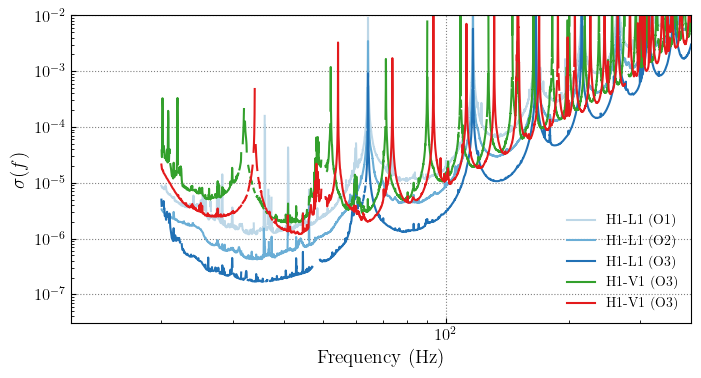

In [3]:
fig,ax = plt.subplots(figsize=(8,4))

ax.plot(f_H1L1_O1,sigma_H1L1_O1,color='#bdd7e7',label='H1-L1 (O1)')
ax.plot(f_H1L1_O2,sigma_H1L1_O2,color='#6baed6',label='H1-L1 (O2)')
ax.plot(f_H1L1_O3,sigma_H1L1_O3,color='#2171b5',label='H1-L1 (O3)')

ax.plot(f_H1V1_O3,sigma_H1V1_O3,color='#33a02c',label='H1-V1 (O3)')
ax.plot(f_L1V1_O3,sigma_L1V1_O3,color='#e31a1c',label='H1-V1 (O3)')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(12,400)
ax.set_ylim(3e-8,1e-2)
ax.legend(loc='lower right',frameon=False,fontsize=10)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$\sigma(f)$')

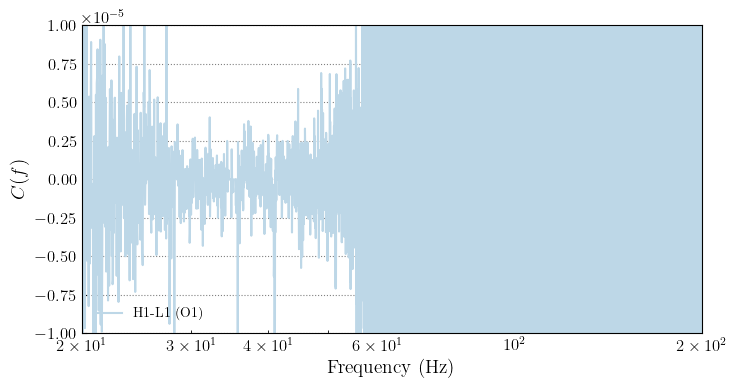

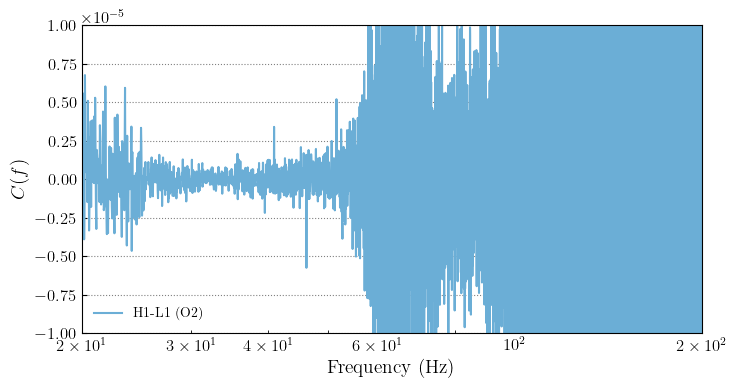

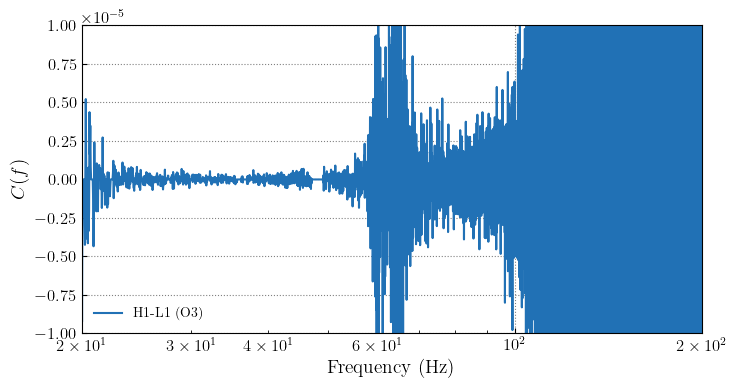

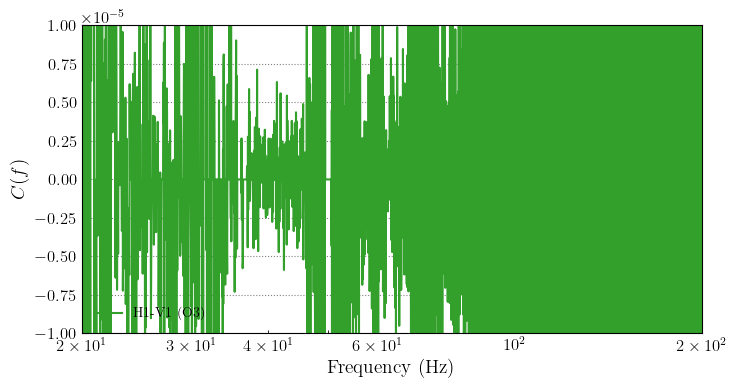

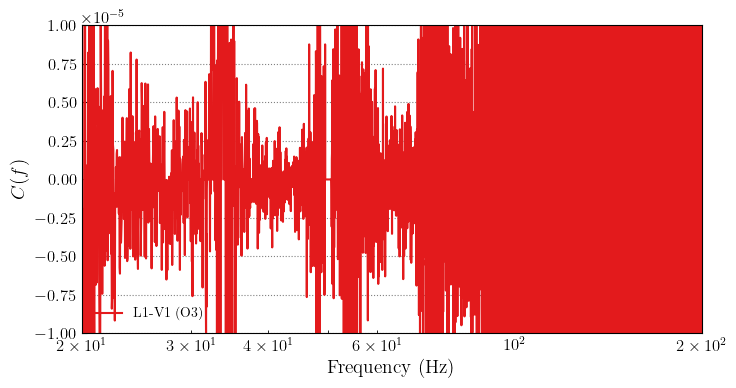

In [4]:
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(f_H1L1_O1,C_H1L1_O1,color='#bdd7e7',label='H1-L1 (O1)')
ax.set_xscale('log')
ax.set_xlim(20,200)
ax.set_ylim(-1e-5,1e-5)
ax.legend(loc='lower left',frameon=False,fontsize=10)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$C(f)$')
plt.show()

fig,ax = plt.subplots(figsize=(8,4))
ax.plot(f_H1L1_O2,C_H1L1_O2,color='#6baed6',label='H1-L1 (O2)')
ax.set_xscale('log')
ax.set_xlim(20,200)
ax.set_ylim(-1e-5,1e-5)
ax.legend(loc='lower left',frameon=False,fontsize=10)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$C(f)$')
plt.show()

fig,ax = plt.subplots(figsize=(8,4))
ax.plot(f_H1L1_O3,C_H1L1_O3,color='#2171b5',label='H1-L1 (O3)')
ax.set_xscale('log')
ax.set_xlim(20,200)
ax.set_ylim(-1e-5,1e-5)
ax.legend(loc='lower left',frameon=False,fontsize=10)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$C(f)$')
plt.show()

fig,ax = plt.subplots(figsize=(8,4))
ax.plot(f_H1V1_O3,C_H1V1_O3,color='#33a02c',label='H1-V1 (O3)')
ax.set_xscale('log')
ax.set_xlim(20,200)
ax.set_ylim(-1e-5,1e-5)
ax.legend(loc='lower left',frameon=False,fontsize=10)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$C(f)$')
plt.show()

fig,ax = plt.subplots(figsize=(8,4))
ax.plot(f_L1V1_O3,C_L1V1_O3,color='#e31a1c',label='L1-V1 (O3)')
ax.set_xscale('log')
ax.set_xlim(20,200)
ax.set_ylim(-1e-5,1e-5)
ax.legend(loc='lower left',frameon=False,fontsize=10)
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('$C(f)$')
plt.show()

In [5]:
matlab_orf_freqs,matlab_orf_H1L1,matlab_orf_H1V1,matlab_orf_L1V1 = np.loadtxt('./matlab_orfs.dat',unpack=True)

In [25]:
H1 = Detector.H1()
L1 = Detector.L1()
V1 = Detector.V1()

H1_L1_baseline = Baseline(H1,L1)
H1_V1_baseline = Baseline(H1,V1)
L1_V1_baseline = Baseline(L1,V1)

python_orf_H1L1,stokesV = H1_L1_baseline.stokes_overlap_reduction_functions(matlab_orf_freqs)
python_orf_H1V1,stokesV = H1_V1_baseline.stokes_overlap_reduction_functions(matlab_orf_freqs)
python_orf_L1V1,stokesV = L1_V1_baseline.stokes_overlap_reduction_functions(matlab_orf_freqs)

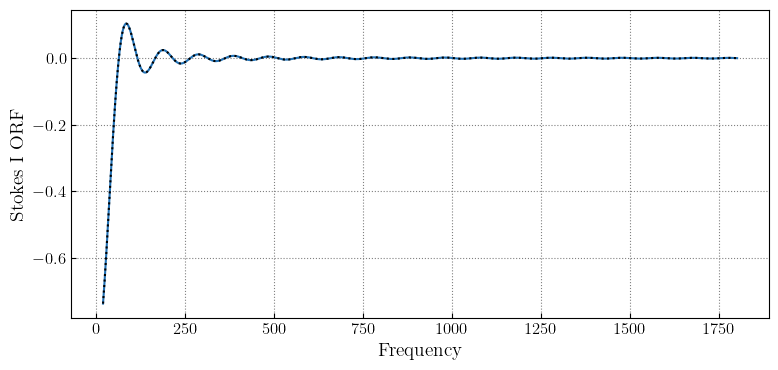

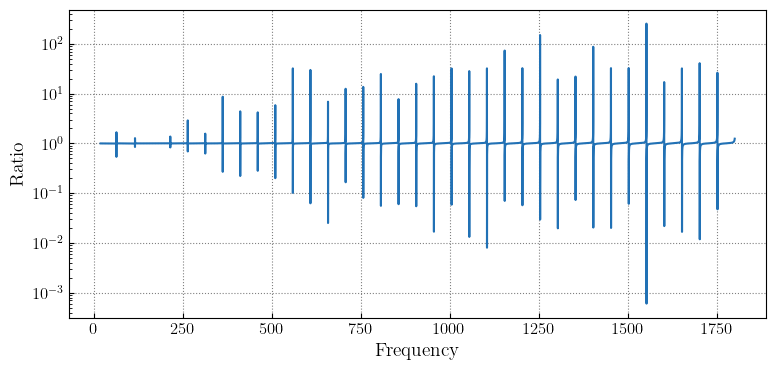

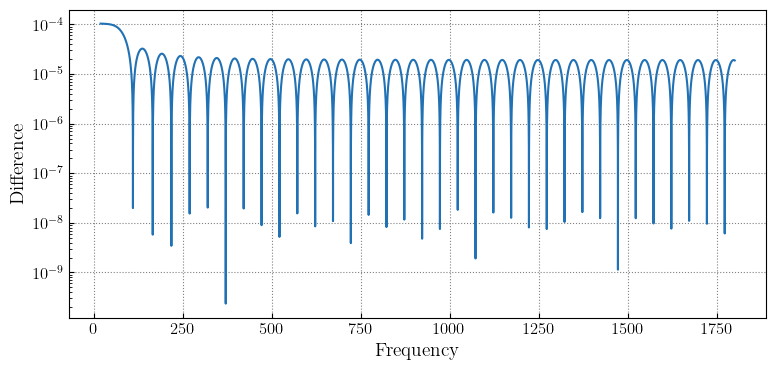

In [31]:
fig,ax = plt.subplots(figsize=(9,4))
ax.plot(matlab_orf_freqs,matlab_orf_H1L1,color='#2171b5')
ax.plot(matlab_orf_freqs,python_orf_H1L1,color='black',ls=':')
ax.set_xlabel('Frequency')
ax.set_ylabel('Stokes I ORF')
plt.show()

fig,ax = plt.subplots(figsize=(9,4))
ax.plot(matlab_orf_freqs,np.abs(matlab_orf_H1L1/python_orf_H1L1),color='#2171b5')
ax.set_xlabel('Frequency')
ax.set_ylabel('Ratio')
ax.set_yscale('log')
plt.show()

fig,ax = plt.subplots(figsize=(9,4))
ax.plot(matlab_orf_freqs,np.abs(matlab_orf_H1L1-python_orf_H1L1),color='#2171b5')
ax.set_xlabel('Frequency')
ax.set_ylabel('Difference')
ax.set_yscale('log')
plt.show()

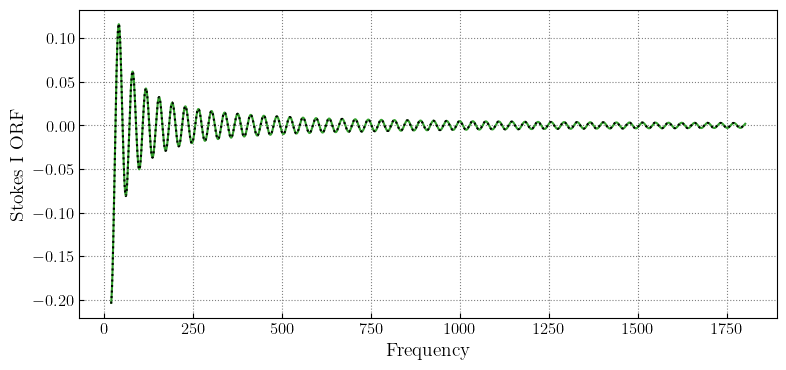

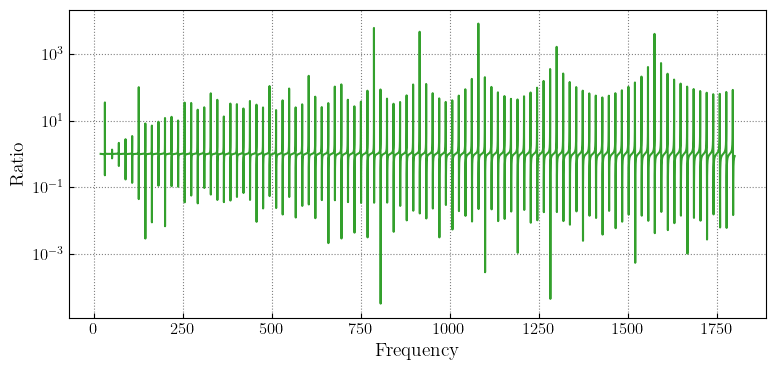

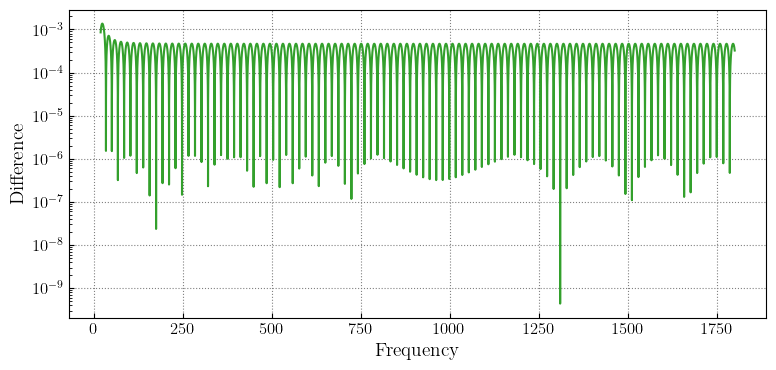

In [32]:
fig,ax = plt.subplots(figsize=(9,4))
ax.plot(matlab_orf_freqs,matlab_orf_H1V1,color='#33a02c')
ax.plot(matlab_orf_freqs,python_orf_H1V1,color='black',ls=':')
ax.set_xlabel('Frequency')
ax.set_ylabel('Stokes I ORF')
plt.show()

fig,ax = plt.subplots(figsize=(9,4))
ax.plot(matlab_orf_freqs,np.abs(matlab_orf_H1V1/python_orf_H1V1),color='#33a02c')
ax.set_xlabel('Frequency')
ax.set_ylabel('Ratio')
ax.set_yscale('log')
plt.show()

fig,ax = plt.subplots(figsize=(9,4))
ax.plot(matlab_orf_freqs,np.abs(matlab_orf_H1V1-python_orf_H1V1),color='#33a02c')
ax.set_xlabel('Frequency')
ax.set_ylabel('Difference')
ax.set_yscale('log')
plt.show()

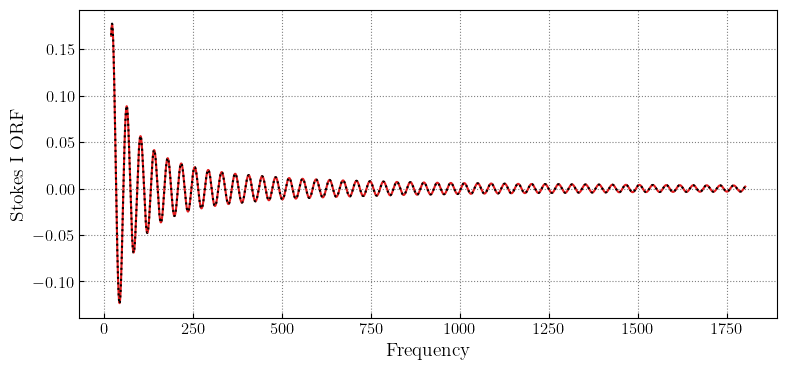

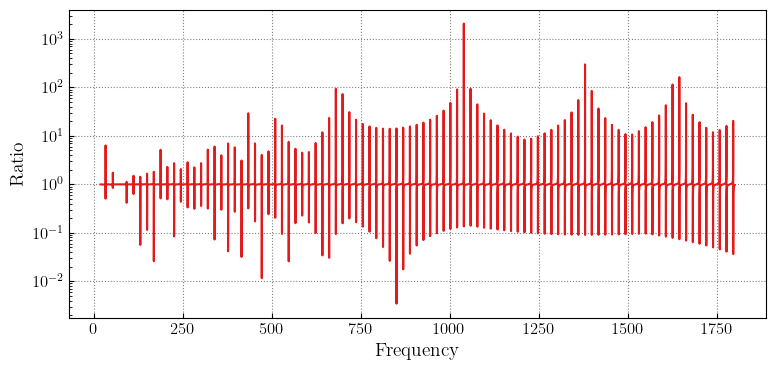

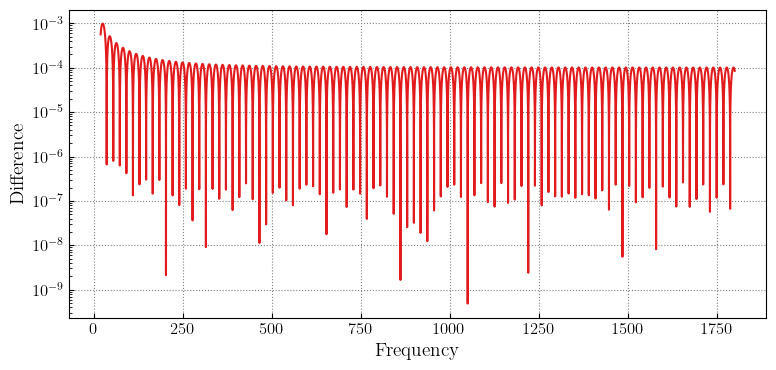

In [33]:
fig,ax = plt.subplots(figsize=(9,4))
ax.plot(matlab_orf_freqs,matlab_orf_L1V1,color='#e31a1c')
ax.plot(matlab_orf_freqs,python_orf_L1V1,color='black',ls=':')
ax.set_xlabel('Frequency')
ax.set_ylabel('Stokes I ORF')
plt.show()

fig,ax = plt.subplots(figsize=(9,4))
ax.plot(matlab_orf_freqs,np.abs(matlab_orf_L1V1/python_orf_L1V1),color='#e31a1c')
ax.set_xlabel('Frequency')
ax.set_ylabel('Ratio')
ax.set_yscale('log')
plt.show()

fig,ax = plt.subplots(figsize=(9,4))
ax.plot(matlab_orf_freqs,np.abs(matlab_orf_L1V1-python_orf_L1V1),color='#e31a1c')
ax.set_xlabel('Frequency')
ax.set_ylabel('Difference')
ax.set_yscale('log')
plt.show()